<a href="https://colab.research.google.com/github/PreslynPeter/DeepLearning2/blob/main/handwrittentext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Epoch 1/20
469/469 - 6s - loss: 0.2490 - accuracy: 0.9254 - val_loss: 0.1061 - val_accuracy: 0.9675
Epoch 2/20
469/469 - 5s - loss: 0.1024 - accuracy: 0.9684 - val_loss: 0.0808 - val_accuracy: 0.9753
Epoch 3/20
469/469 - 5s - loss: 0.0738 - accuracy: 0.9772 - val_loss: 0.0748 - val_accuracy: 0.9767
Epoch 4/20
469/469 - 5s - loss: 0.0568 - accuracy: 0.9816 - val_loss: 0.0704 - val_accuracy: 0.9775
Epoch 5/20
469/469 - 5s - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.0730 - val_accuracy: 0.9789
Epoch 6/20
469/469 - 5s - loss: 0.0388 - accuracy: 0.9870 - val_loss: 0.0639 - val_accuracy: 0.9812
Epoch 7/20
469/469 - 5s - loss: 0.0336 - accuracy: 0.9886 - val_loss: 0.0691 - val_accuracy: 0.9816
Epoch 8/20
469/469

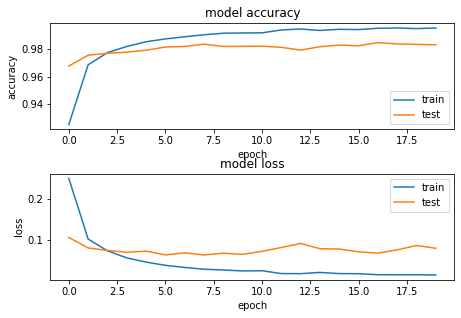

In [47]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plot

# silent all warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))

#print("Network Architecture defined")

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
optimizer='adam')

#Loaded Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#print("loaded data")
#Examining Data Points
# printing first 10 images
for i in range(10):
  plot.subplot(3,5,i+1)
  plot.tight_layout()
  plot.imshow(X_train[i], cmap='gray', interpolation='none')
  plot.title("Digit: {}".format(y_train[i]))
  plot.xticks([])
  plot.yticks([])
#Reshaping Input Vector
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#Normalizing Data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
plot.hist(X_train[0])
plot.title("Digit: {}".format(y_train[0]))
plot.hist(X_train[2])
plot.title("Digit: {}".format(y_train[2]))

print(np.unique(y_train, return_counts=True))
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
for i in range(5):
 print (Y_train[i])
Y_test = np_utils.to_categorical(y_test, n_classes)
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
         validation_data=(X_test, Y_test))
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

plot.subplot(2,1,1)
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

predictions = model.predict_classes(X_test)
correct_predictions = np.nonzero(predictions == y_test)[0]
incorrect_predictions = np.nonzero(predictions != y_test)[0]
print(len(correct_predictions)," classified correctly")
print(len(incorrect_predictions)," classified incorrectly")


